In [2]:
import pandas as pd
import datetime as dt
import time
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import filedialog

In [16]:
###Import data
root = tk.Tk()
root.withdraw()
file_path = filedialog.askopenfilename()
my_header = int(input("Please enter the number of the row containing the column labels (int only)\n"))-1
my_footer = int(input("Please enter the number of the last row of data (int only)\n"))-2
df = pd.read_excel(file_path,header=my_header) #Save Excel data in dataframe
df.head(10) ### Preview dataframe

,Unnamed: 0,Time,T° 600,A1,A2,A3,A4,A5,A6,A7,...,H3,H4,H5,H6,H7,H8,H9,H10,H11,H12
0,NaN,00:00:00,36.9,0.093,0.437,0.447,0.467,0.452,0.483,0.392,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,00:15:00,37,0.093,0.447,0.459,0.485,0.458,0.487,0.407,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,00:30:00,37,0.092,0.463,0.476,0.51,0.471,0.499,0.427,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,00:45:00,37,0.093,0.481,0.493,0.534,0.483,0.511,0.446,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,01:00:00,37,0.092,0.498,0.509,0.554,0.493,0.524,0.462,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,01:15:00,36.9,0.092,0.518,0.526,0.571,0.5,0.535,0.477,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,01:30:00,37,0.093,0.538,0.545,0.585,0.506,0.546,0.489,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,01:45:00,37,0.093,0.559,0.551,0.596,0.51,0.556,0.499,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,02:00:00,37,0.093,0.579,0.554,0.605,0.517,0.563,0.506,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,02:15:00,37,0.092,0.599,0.557,0.612,0.523,0.568,0.51,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
### Perform initial trims (must be .xls file)
df = df.dropna(how='all',axis='columns') #Remove columns with no data
df = df.loc[:(my_footer-my_header),:]
df.head(10)

,Unnamed: 0,Time,T° 600,A1,A2,A3,A4,A5,A6,A7,...,B9,C1,C2,C3,C4,C5,C6,C7,C8,C9
0,NaN,00:00:00,36.9,0.093,0.437,0.447,0.467,0.452,0.483,0.392,...,0.450,0.094,0.442,0.453,0.448,0.466,0.495,0.401,0.440,0.449
1,NaN,00:15:00,37,0.093,0.447,0.459,0.485,0.458,0.487,0.407,...,0.459,0.094,0.457,0.464,0.463,0.471,0.501,0.416,0.462,0.463
2,NaN,00:30:00,37,0.092,0.463,0.476,0.51,0.471,0.499,0.427,...,0.479,0.093,0.476,0.481,0.489,0.485,0.516,0.437,0.493,0.492
3,NaN,00:45:00,37,0.093,0.481,0.493,0.534,0.483,0.511,0.446,...,0.499,0.094,0.493,0.499,0.512,0.498,0.532,0.456,0.523,0.521
4,NaN,01:00:00,37,0.092,0.498,0.509,0.554,0.493,0.524,0.462,...,0.515,0.093,0.511,0.515,0.531,0.507,0.546,0.472,0.547,0.545
5,NaN,01:15:00,36.9,0.092,0.518,0.526,0.571,0.5,0.535,0.477,...,0.527,0.093,0.530,0.530,0.547,0.515,0.559,0.486,0.566,0.567
6,NaN,01:30:00,37,0.093,0.538,0.545,0.585,0.506,0.546,0.489,...,0.538,0.094,0.551,0.543,0.558,0.520,0.568,0.497,0.582,0.584
7,NaN,01:45:00,37,0.093,0.559,0.551,0.596,0.51,0.556,0.499,...,0.547,0.093,0.573,0.555,0.568,0.524,0.577,0.507,0.593,0.598
8,NaN,02:00:00,37,0.093,0.579,0.554,0.605,0.517,0.563,0.506,...,0.554,0.094,0.589,0.562,0.576,0.526,0.584,0.514,0.602,0.608
9,NaN,02:15:00,37,0.092,0.599,0.557,0.612,0.523,0.568,0.51,...,0.559,0.094,0.608,0.571,0.582,0.527,0.590,0.520,0.608,0.616


In [18]:
###Convert time to decimal hours format (only works for <24h run)
for i,item in enumerate(df['Time']):
    temp = dt.time.fromisoformat(str(df['Time'].iloc[i]))    
    df['Time'].iloc[i] = float(temp.hour + (temp.minute/60))

df.head(10) 

/Users/ddooley/venvs/env/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,Unnamed: 0,Time,T° 600,A1,A2,A3,A4,A5,A6,A7,...,B9,C1,C2,C3,C4,C5,C6,C7,C8,C9
0,NaN,0,36.9,0.093,0.437,0.447,0.467,0.452,0.483,0.392,...,0.450,0.094,0.442,0.453,0.448,0.466,0.495,0.401,0.440,0.449
1,NaN,0.25,37,0.093,0.447,0.459,0.485,0.458,0.487,0.407,...,0.459,0.094,0.457,0.464,0.463,0.471,0.501,0.416,0.462,0.463
2,NaN,0.5,37,0.092,0.463,0.476,0.51,0.471,0.499,0.427,...,0.479,0.093,0.476,0.481,0.489,0.485,0.516,0.437,0.493,0.492
3,NaN,0.75,37,0.093,0.481,0.493,0.534,0.483,0.511,0.446,...,0.499,0.094,0.493,0.499,0.512,0.498,0.532,0.456,0.523,0.521
4,NaN,1,37,0.092,0.498,0.509,0.554,0.493,0.524,0.462,...,0.515,0.093,0.511,0.515,0.531,0.507,0.546,0.472,0.547,0.545
5,NaN,1.25,36.9,0.092,0.518,0.526,0.571,0.5,0.535,0.477,...,0.527,0.093,0.530,0.530,0.547,0.515,0.559,0.486,0.566,0.567
6,NaN,1.5,37,0.093,0.538,0.545,0.585,0.506,0.546,0.489,...,0.538,0.094,0.551,0.543,0.558,0.520,0.568,0.497,0.582,0.584
7,NaN,1.75,37,0.093,0.559,0.551,0.596,0.51,0.556,0.499,...,0.547,0.093,0.573,0.555,0.568,0.524,0.577,0.507,0.593,0.598
8,NaN,2,37,0.093,0.579,0.554,0.605,0.517,0.563,0.506,...,0.554,0.094,0.589,0.562,0.576,0.526,0.584,0.514,0.602,0.608
9,NaN,2.25,37,0.092,0.599,0.557,0.612,0.523,0.568,0.51,...,0.559,0.094,0.608,0.571,0.582,0.527,0.590,0.520,0.608,0.616


In [21]:
###Enter blank columns
print(df.head(10)) #Show data to aid in column selection

b = input("\nEnter any columns that you want deleted in a comma-separated list: ")
if not b.split():
    pass
else:
    for ind in b.split(","):
        if ind != " " or ind != "":
            ind = ind.strip()
            df = df.drop([ind], axis='columns')
        else:
            pass
df.head(10) #Show data to aid in column selection

   Time T° 600     A1     A2     A3     A4     A5     A6     A7     A8  ...  \
0     0   36.9  0.093  0.437  0.447  0.467  0.452  0.483  0.392  0.428  ...   
1  0.25     37  0.093  0.447  0.459  0.485  0.458  0.487  0.407  0.439  ...   
2   0.5     37  0.092  0.463  0.476   0.51  0.471  0.499  0.427  0.456  ...   
3  0.75     37  0.093  0.481  0.493  0.534  0.483  0.511  0.446  0.472  ...   
4     1     37  0.092  0.498  0.509  0.554  0.493  0.524  0.462  0.485  ...   
5  1.25   36.9  0.092  0.518  0.526  0.571    0.5  0.535  0.477  0.496  ...   
6   1.5     37  0.093  0.538  0.545  0.585  0.506  0.546  0.489  0.507  ...   
7  1.75     37  0.093  0.559  0.551  0.596   0.51  0.556  0.499  0.516  ...   
8     2     37  0.093  0.579  0.554  0.605  0.517  0.563  0.506   0.52  ...   
9  2.25     37  0.092  0.599  0.557  0.612  0.523  0.568   0.51  0.525  ...   

      B9     C1     C2     C3     C4     C5     C6     C7     C8     C9  
0  0.450  0.094  0.442  0.453  0.448  0.466  0.495  0.40

,Time,T° 600,A1,A2,A3,A4,A5,A6,A7,A8,...,B9,C1,C2,C3,C4,C5,C6,C7,C8,C9
0,0,36.9,0.093,0.437,0.447,0.467,0.452,0.483,0.392,0.428,...,0.450,0.094,0.442,0.453,0.448,0.466,0.495,0.401,0.440,0.449
1,0.25,37,0.093,0.447,0.459,0.485,0.458,0.487,0.407,0.439,...,0.459,0.094,0.457,0.464,0.463,0.471,0.501,0.416,0.462,0.463
2,0.5,37,0.092,0.463,0.476,0.51,0.471,0.499,0.427,0.456,...,0.479,0.093,0.476,0.481,0.489,0.485,0.516,0.437,0.493,0.492
3,0.75,37,0.093,0.481,0.493,0.534,0.483,0.511,0.446,0.472,...,0.499,0.094,0.493,0.499,0.512,0.498,0.532,0.456,0.523,0.521
4,1,37,0.092,0.498,0.509,0.554,0.493,0.524,0.462,0.485,...,0.515,0.093,0.511,0.515,0.531,0.507,0.546,0.472,0.547,0.545
5,1.25,36.9,0.092,0.518,0.526,0.571,0.5,0.535,0.477,0.496,...,0.527,0.093,0.530,0.530,0.547,0.515,0.559,0.486,0.566,0.567
6,1.5,37,0.093,0.538,0.545,0.585,0.506,0.546,0.489,0.507,...,0.538,0.094,0.551,0.543,0.558,0.520,0.568,0.497,0.582,0.584
7,1.75,37,0.093,0.559,0.551,0.596,0.51,0.556,0.499,0.516,...,0.547,0.093,0.573,0.555,0.568,0.524,0.577,0.507,0.593,0.598
8,2,37,0.093,0.579,0.554,0.605,0.517,0.563,0.506,0.52,...,0.554,0.094,0.589,0.562,0.576,0.526,0.584,0.514,0.602,0.608
9,2.25,37,0.092,0.599,0.557,0.612,0.523,0.568,0.51,0.525,...,0.559,0.094,0.608,0.571,0.582,0.527,0.590,0.520,0.608,0.616


In [26]:
###Enter data series
series_bool = True
legend_names = []
names=[]
while series_bool:
    ans = str(input("\nWould you like to add a data series? "))
    if (ans == "yes" or ans == "y" or ans == "Y" or ans == "Yes" or ans == "YES"):
        data = []
        name = input("\nEnter the name for this data series: ")
        d = input("\nEnter the column(s) containing OD data for this series (separated by commas if in replicates): ")
        for ind in d.split(","):
            data.append(ind.strip())
        if len(d) > 1:
            df[name+'_avg']=df.loc[:,data].mean(axis=1) #Average duplicates, triplicates, etc.
            names.append(name+'_avg') #Save name of series to list
            legend_names.append(name)
        else:
            df[name+'_avg']=df[data]
    else:
        series_bool = False

['Series 1', 'Series 2', 'Series 3', 'Series 4', 'Series 5']


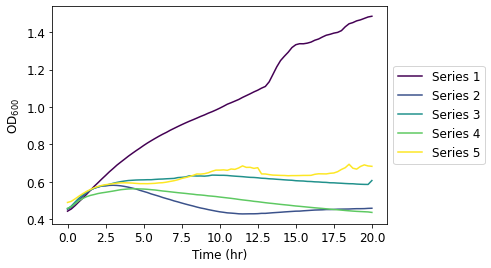

In [30]:
fig, ax1 = plt.subplots()
df.plot(x='Time', y=names, cmap = 'tab20', ax=ax1)
ax1.set_xlabel("Time (hr)")
ax1.set_ylabel("OD$_{600}$")
ax1.legend(legend_names, loc='center left', bbox_to_anchor=(1,0.5))
plt.rcParams.update({'font.size': 12})

""" Uncomment this section if you want to alter the individual color and line type of data series"""
#################################################################################################
#################################################################################################
# change_list = ""
# change_list = input("\nWhich of the following data series do you want to edit (separate by commas if multiple, or type 'all' to edit all series)?\n\n%s" % names)
# if change_list == "all":
#     for line in ax1.get_lines():
#         name = line.get_label()
#         color = str(input("Specify a color for %s (ex. 'blue', 'red', 'green', etc.): " % name))
#         if color != "":
#             line.set_color(color)
#         line_style = str(input("Specify a line style for %s (ex. 'solid', 'dashed', 'dashdot', 'dotted', or 'None'): " % name))
#         if line_style != "":
#             line.set_linestyle(line_style)
#         line_width = input("Specify a line width in points for %s (default is 1.5): " % name)
#         if line_width != "":
#             line.set_linewidth(float(line_width))
#     ax1.legend(legend_names, loc='center left', bbox_to_anchor=(1,0.5))
# elif (change_list != "None" and change_list != ""):
#     for name in change_list.split(","):
#         name = name.strip()
#         line = [line for line in ax1.get_lines() if line.get_label() == name][0] ### Get appropriate data series
#         color = str(input("Specify a color for %s (ex. 'blue', 'red', 'green', etc.): " % name))
#         if color != "":
#             line.set_color(color)
#         line_style = str(input("Specify a line style for %s (ex. 'solid', 'dashed', 'dashdot', 'dotted', or 'None'): " % name))
#         if line_style != "":
#             line.set_linestyle(line_style)
#         line_width = input("Specify a line width in points for %s (default is 1.5): " % name)
#         if line_width != "":
#             line.set_linewidth(float(line_width))
#     ax1.legend(legend_names, loc='center left', bbox_to_anchor=(1,0.5))
# else:
#     pass
#################################################################################################
#################################################################################################

plt.show()

In [32]:
ax1.set_title("Woops I forgot")

Text(0.5, 1.0, 'Woops I forgot')

In [33]:
plot_name = input('\nSave figure as: ')
fig.savefig(plot_name, bbox_inches = 'tight', dpi=500)

,A1,B1,C1
0,0.093,0.094,0.094
1,0.093,0.093,0.094
2,0.092,0.093,0.093
3,0.093,0.094,0.094
4,0.092,0.093,0.093
...,...,...,...
76,0.093,0.097,0.814
77,0.093,0.098,0.825
78,0.093,0.098,0.833
79,0.092,0.097,0.845
